In [14]:
!pip install pandas
!pip install scikit-learn
!pip install numpy

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [19]:
data = pd.read_csv('datasets/creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [20]:
X = data.drop('Class', axis=1).values
y = data['Class'].values

In [21]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [22]:
cluster = KMeans(n_clusters=2, random_state=42, n_init=10)
cluster.fit(X_scaled)

,n_clusters,2
,init,'k-means++'
,n_init,10
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [23]:
centers = cluster.cluster_centers_
assigned = cluster.labels_

In [24]:
contamination = max(1e-6, y.mean())
distances = np.linalg.norm(X_scaled - centers[assigned], axis=1)
threshold = np.quantile(distances, 1.0 - contamination)

In [25]:
y_pred = (distances > threshold).astype(int)

In [26]:
print('Fraud Fraction: ', contamination)
print('Threshold: ', threshold)

Fraud Fraction:  0.001727485630620034
Threshold:  29.456417968706795


In [27]:
print('Classification Report: \n')
print(classification_report(y, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y, y_pred))

Classification Report: 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    284315
           1       0.23      0.23      0.23       492

    accuracy                           1.00    284807
   macro avg       0.62      0.62      0.62    284807
weighted avg       1.00      1.00      1.00    284807

Confusion Matrix:
 [[283937    378]
 [   378    114]]


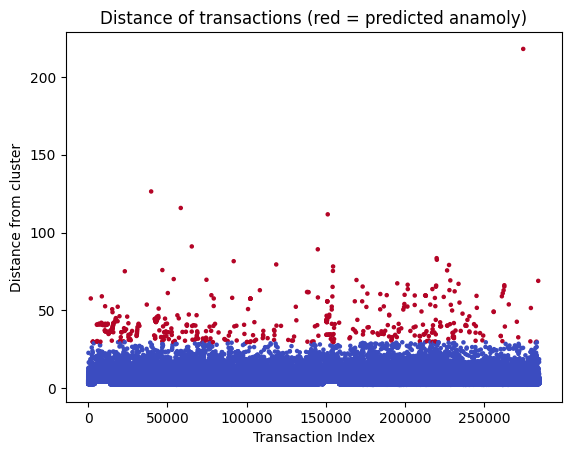

In [28]:
plt.scatter(range(len(distances)), distances, c=y_pred, cmap='coolwarm', s=5)
plt.xlabel('Transaction Index')
plt.ylabel('Distance from cluster')
plt.title('Distance of transactions (red = predicted anamoly)')
plt.show()